In [254]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
import seaborn as sns
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, precision_recall_curve, classification_report, mean_squared_error, mean_absolute_error
# from sklearn.preprocessing import RobustSca

In [255]:
pd.set_option('display.max_columns', 50)

In [256]:
pd.set_option('display.max_columns', 50)

In [257]:
df = pd.read_excel('data/Office Supply Campaign ResultS 7-23-19.xlsx')

In [258]:
# clean a column names
df.columns = [col.strip().lower().replace(' ', '_') for col in df.columns]

In [259]:
def buy_or_not_buy(x):
    if x > 0:
        return 'Buy'
    else:
        return 'Not_Buy'

In [260]:
df['made_purchase'] = df['campaign_period_sales'].apply(buy_or_not_buy)
df.head()

,customer_number,campaign_period_sales,historical_sales_volume,date_of_first_purchase,number_of_prior_year_transactions,do_not_direct_mail_solicit,do_not_email,do_not_telemarket,repurchase_method,last_transaction_channel,desk,executive_chair,standard_chair,monitor,printer,computer,insurance,toner,office_supplies,number_of_employees,language,made_purchase
0,86734.0,238.704762,146803.428571,1968-10-01,15.0,0.0,0.0,0.0,AUTO RENEW,AUTO RENEW,N,N,N,N,N,N,Y,N,Y,6-10,English,Buy
1,97098.0,281.680000,439984.160000,1981-06-15,22.0,0.0,0.0,0.0,NOTICE,MAIL,N,N,N,N,N,N,N,N,Y,11-50,English,Buy
2,100836.0,432.857143,970465.714286,1962-11-01,19.0,0.0,0.0,0.0,NOTICE,MAIL,N,N,N,N,N,N,N,N,Y,6-10,English,Buy
3,116390.0,0.000000,230193.600000,1983-06-01,17.0,0.0,0.0,0.0,NOTICE,PHONE,N,N,N,N,N,N,N,N,Y,1-5,English,Not_Buy
4,127914.0,1370.166667,27403.333333,1987-07-15,21.0,0.0,0.0,0.0,NOTICE,BRANCH (PHONE),N,N,N,N,N,N,Y,N,N,,NaN,Buy


In [261]:
df.columns

Index(['customer_number', 'campaign_period_sales', 'historical_sales_volume',
       'date_of_first_purchase', 'number_of_prior_year_transactions',
       'do_not_direct_mail_solicit', 'do_not_email', 'do_not_telemarket',
       'repurchase_method', 'last_transaction_channel', 'desk',
       'executive_chair', 'standard_chair', 'monitor', 'printer', 'computer',
       'insurance', 'toner', 'office_supplies', 'number_of_employees',
       'language', 'made_purchase'],
      dtype='object')

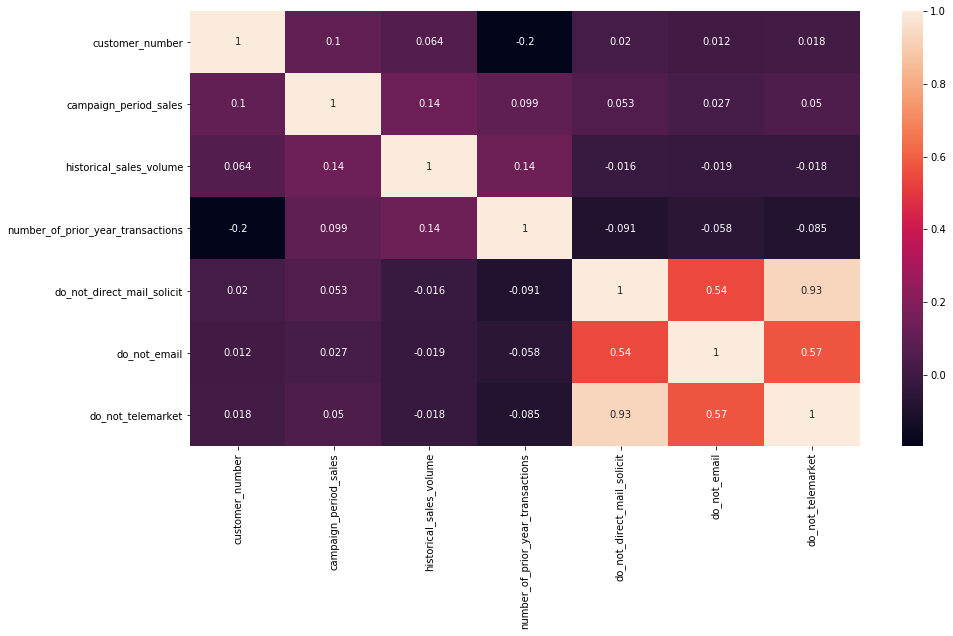

In [262]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True)
# Save Figure
plt.savefig("resources/Fig5.png")

In [263]:
products = ['desk', 'executive_chair', 'standard_chair', 'monitor', 'printer', 'computer', 'insurance', 'toner', 'office_supplies']
prods = df.loc[:, products]
prods.head()

,desk,executive_chair,standard_chair,monitor,printer,computer,insurance,toner,office_supplies
0,N,N,N,N,N,N,Y,N,Y
1,N,N,N,N,N,N,N,N,Y
2,N,N,N,N,N,N,N,N,Y
3,N,N,N,N,N,N,N,N,Y
4,N,N,N,N,N,N,Y,N,N


In [264]:
def yner(x):
    if x == 'N':
        return 0
    else:
        return 1

In [265]:
for product in products:
    prods[product] = prods[product].apply(yner)
prods.head()

,desk,executive_chair,standard_chair,monitor,printer,computer,insurance,toner,office_supplies
0,0,0,0,0,0,0,1,0,1
1,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1,0,0


In [266]:
df.isnull().sum()

customer_number                         1
campaign_period_sales                   1
historical_sales_volume                 1
date_of_first_purchase                  1
number_of_prior_year_transactions       1
do_not_direct_mail_solicit              1
do_not_email                            1
do_not_telemarket                       1
repurchase_method                       1
last_transaction_channel              443
desk                                    0
executive_chair                         2
standard_chair                          2
monitor                                 2
printer                                 2
computer                                1
insurance                               3
toner                                   3
office_supplies                         1
number_of_employees                     3
language                             4472
made_purchase                           0
dtype: int64

In [267]:
df[['language', 'last_transaction_channel']].fillna('unknown').head()

,language,last_transaction_channel
0,English,AUTO RENEW
1,English,MAIL
2,English,MAIL
3,English,PHONE
4,unknown,BRANCH (PHONE)


In [268]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer() # transform or normalize the numberical features

In [269]:
tf= pt.fit_transform(df[['campaign_period_sales', 'historical_sales_volume']])

In [270]:
# fig, ax = plt.subplots(nrows = 2, ncols=2, figsize=(12,6))
# ax[0, 0].hist(df['campaign_period_sales'])
# ax[0,1].hist(tf[:,0])
# ax[1,0].hist(tf['historical_sales_volume'])
# ax[1,1].hist(tf[:,1]);


In [271]:
df['date_of_first_purchase'] = pd.to_datetime(df['date_of_first_purchase'])
df['year_of_fp']= df['date_of_first_purchase'].dt.year

In [272]:
df['made_purchase'] = df['campaign_period_sales'].apply(buy_or_not_buy)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


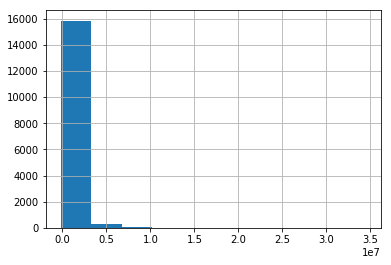

In [273]:
# Normalize the historical_sale_volume
df['historical_sales_volume'].hist()
# plt.hist(np.log(df['historical_sales_volume']))
df['history_log'] = np.log(df['historical_sales_volume'])

In [274]:
df.columns

Index(['customer_number', 'campaign_period_sales', 'historical_sales_volume',
       'date_of_first_purchase', 'number_of_prior_year_transactions',
       'do_not_direct_mail_solicit', 'do_not_email', 'do_not_telemarket',
       'repurchase_method', 'last_transaction_channel', 'desk',
       'executive_chair', 'standard_chair', 'monitor', 'printer', 'computer',
       'insurance', 'toner', 'office_supplies', 'number_of_employees',
       'language', 'made_purchase', 'year_of_fp', 'history_log'],
      dtype='object')

In [275]:
def convert_fill_numemploy(val):
    if val == "1-5": return 3
    if val == "6-20": return 8
    if val == "11-50": return 30
    if val == "51-100": return 75
    if val == "1001-500": return 300
    if val == "500+": return 500
    else: return np.nan

In [276]:
df['num_employee_converted'] = df['number_of_employees'].apply(convert_fill_numemploy)

In [277]:
def english_or_not(x):
    if x =='English':
        return 1
    else:
        return 0

In [278]:
df['language'] = df['language'].apply(english_or_not)
df['number_of_employees'] = df['number_of_employees'].apply(convert_fill_numemploy)

In [279]:
def buy_or_not_buy(x):
    if x > 0:
        return 1
    else:
        return 0

In [280]:
def yner(x):
    if x == 'N':
        return 0
    else:
        return 1

In [281]:
df['made_purchase'] = df['campaign_period_sales'].apply(buy_or_not_buy)
df.head()


,customer_number,campaign_period_sales,historical_sales_volume,date_of_first_purchase,number_of_prior_year_transactions,do_not_direct_mail_solicit,do_not_email,do_not_telemarket,repurchase_method,last_transaction_channel,desk,executive_chair,standard_chair,monitor,printer,computer,insurance,toner,office_supplies,number_of_employees,language,made_purchase,year_of_fp,history_log,num_employee_converted
0,86734.0,238.704762,146803.428571,1968-10-01,15.0,0.0,0.0,0.0,AUTO RENEW,AUTO RENEW,N,N,N,N,N,N,Y,N,Y,NaN,1,1,1968.0,11.896850,NaN
1,97098.0,281.680000,439984.160000,1981-06-15,22.0,0.0,0.0,0.0,NOTICE,MAIL,N,N,N,N,N,N,N,N,Y,30.0,1,1,1981.0,12.994494,30.0
2,100836.0,432.857143,970465.714286,1962-11-01,19.0,0.0,0.0,0.0,NOTICE,MAIL,N,N,N,N,N,N,N,N,Y,NaN,1,1,1962.0,13.785531,NaN
3,116390.0,0.000000,230193.600000,1983-06-01,17.0,0.0,0.0,0.0,NOTICE,PHONE,N,N,N,N,N,N,N,N,Y,3.0,1,0,1983.0,12.346676,3.0
4,127914.0,1370.166667,27403.333333,1987-07-15,21.0,0.0,0.0,0.0,NOTICE,BRANCH (PHONE),N,N,N,N,N,N,Y,N,N,NaN,0,1,1987.0,10.218420,NaN


In [282]:
products = ['desk','executive_chair', 'standard_chair', 'monitor', 'printer', 'computer', 'insurance', 'toner', 'office_supplies']

In [283]:
for product in products:
    df[product] = df[product].apply(yner)
df.head()

,customer_number,campaign_period_sales,historical_sales_volume,date_of_first_purchase,number_of_prior_year_transactions,do_not_direct_mail_solicit,do_not_email,do_not_telemarket,repurchase_method,last_transaction_channel,desk,executive_chair,standard_chair,monitor,printer,computer,insurance,toner,office_supplies,number_of_employees,language,made_purchase,year_of_fp,history_log,num_employee_converted
0,86734.0,238.704762,146803.428571,1968-10-01,15.0,0.0,0.0,0.0,AUTO RENEW,AUTO RENEW,0,0,0,0,0,0,1,0,1,NaN,1,1,1968.0,11.896850,NaN
1,97098.0,281.680000,439984.160000,1981-06-15,22.0,0.0,0.0,0.0,NOTICE,MAIL,0,0,0,0,0,0,0,0,1,30.0,1,1,1981.0,12.994494,30.0
2,100836.0,432.857143,970465.714286,1962-11-01,19.0,0.0,0.0,0.0,NOTICE,MAIL,0,0,0,0,0,0,0,0,1,NaN,1,1,1962.0,13.785531,NaN
3,116390.0,0.000000,230193.600000,1983-06-01,17.0,0.0,0.0,0.0,NOTICE,PHONE,0,0,0,0,0,0,0,0,1,3.0,1,0,1983.0,12.346676,3.0
4,127914.0,1370.166667,27403.333333,1987-07-15,21.0,0.0,0.0,0.0,NOTICE,BRANCH (PHONE),0,0,0,0,0,0,1,0,0,NaN,0,1,1987.0,10.218420,NaN


In [284]:
def repurch_method(x):
    if x =='AUTO RENEW':
        return 1
    else:
        return 0

In [285]:
df['re_purch_method'] = df['repurchase_method'].apply(repurch_method)

In [286]:
def last_tran_chan(x):
    if x =='PHONE':
        return 1
    else:
        return 0

In [298]:
df['last_tran_channel'] = df['last_transaction_channel'].apply(repurch_method)

In [299]:
# X = df[['campaign_period_sales', 'history_log', 'historical_sales_volume', 'number_of_prior_year_transactions', 'year_of_fp', 'made_purchase']].dropna()


X = df[['campaign_period_sales', 'history_log', 'historical_sales_volume',
        'number_of_prior_year_transactions', 'year_of_fp',
       'do_not_direct_mail_solicit', 'do_not_email', 'do_not_telemarket', 'desk',
       'executive_chair', 'standard_chair', 'monitor', 'printer', 'computer',
       'insurance', 'toner', 'office_supplies', 'number_of_employees',
       'language', 'made_purchase', 'year_of_fp', 'history_log',
       'num_employee_converted', 're_purch_method', 'last_tran_channel']].dropna()


X_train, X_test, y_train, y_test = train_test_split(X.iloc[:, :-1], X['made_purchase'], test_size =0.5) # 50 vs 30 split
X_train.head()

,campaign_period_sales,history_log,historical_sales_volume,number_of_prior_year_transactions,year_of_fp,do_not_direct_mail_solicit,do_not_email,do_not_telemarket,desk,executive_chair,standard_chair,monitor,printer,computer,insurance,toner,office_supplies,number_of_employees,language,made_purchase,year_of_fp,history_log,num_employee_converted,re_purch_method
10149,239.426667,12.365800,234638.133333,14.0,1993.0,1.0,1.0,1.0,0,0,0,0,0,0,0,0,1,3.0,1,1,1993.0,12.365800,3.0,0
1768,0.000000,11.912243,149080.746667,4.0,1993.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0,1,30.0,1,0,1993.0,11.912243,30.0,0
4173,0.000000,13.238324,561475.699200,18.0,2005.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,1,3.0,1,0,2005.0,13.238324,3.0,1
12081,790.320000,13.085897,482095.200000,10.0,1994.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0,1,75.0,1,1,1994.0,13.085897,75.0,0
7529,0.000000,12.444964,253968.000000,20.0,1985.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1,3.0,1,0,1985.0,12.444964,3.0,0


In [300]:
y_train.value_counts()

0    2385
1     883
Name: made_purchase, dtype: int64

In [301]:
y_tr_reg = X_train['campaign_period_sales']
y_test_reg = X_test['campaign_period_sales']

In [302]:
from sklearn.linear_model import LinearRegression, LogisticRegression
clf = LogisticRegression()
clf.fit(X_train.iloc[:, 1:], y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [303]:
for col, coef in zip(['history', 'num_prior', 'year'], clf.coef_[0]):
    print(col, coef)

history -1.3350427288512807e-06
num_prior -2.124763582259553e-07
year -1.5301543045778643e-06


In [304]:
# NB. Two thing we are predicting: whether or not they made a made_purchase - Classification problem and How much they bought - regression problem.

# NB. Put more features later

clf.predict_proba(X_test.iloc[:, 1:]) #we need the second column, the probability of beig +ev
probs = clf.predict_proba(X_test.iloc[:, 1:])[:, 1]
pred = clf.predict(X_test.iloc[:, 1:])

In [305]:
len(X_train)

3268

In [306]:
# Now regerssion Model
from sklearn.linear_model import LinearRegression # regular linear regression

In [307]:
reg = LinearRegression()
reg.fit(X_train.iloc[:, 1:], y_tr_reg)
pred_sales = reg.predict(X_test.iloc[:, 1:])

In [308]:
ans_df = pd.DataFrame({'sales': pred_sales, 'prob': probs}) # 2 models- prediction and regression.

In [309]:
ans_df['profit'] = .22*ans_df['sales'] - 8.4*ans_df['sales'] - 45.65
ans_df.head()

,sales,prob,profit
0,-81.348170,0.276057,619.778029
1,42.401902,0.259448,-392.497556
2,4.891779,0.277246,-85.664754
3,-0.227259,0.283185,-43.791018
4,96.047082,0.260675,-831.315130


In [310]:
ans_df['group'] = pd.qcut(ans_df['profit'], 10, duplicates='drop')

In [311]:
ans_df.groupby('group').mean().sort_values(by='profit', ascending=False)

,sales,prob,profit
group,,,
"(469.685, 1113.708]",-83.779026,0.287810,639.662431
"(314.997, 469.685]",-52.578018,0.283020,384.438190
"(175.784, 314.997]",-35.843755,0.278161,247.551917
"(40.555, 175.784]",-18.818786,0.273715,108.287669
"(-114.836, 40.555]",-1.555061,0.267472,-32.929603
"(-297.334, -114.836]",19.693726,0.261805,-206.744680
"(-2109.393, -297.334]",60.937906,0.254335,-544.122067
"(-2955.636, -2109.393]",332.177647,0.274799,-2762.863155
"(-3331.659, -2955.636]",377.859506,0.268253,-3136.540760


In [312]:
lift_chart = ans_df.groupby('group').mean().sort_values(by='profit', ascending=False)

In [313]:
lift_chart['size'] = ans_df.groupby('group').size()

lift_chart

,sales,prob,profit,size
group,,,,
"(469.685, 1113.708]",-83.779026,0.287810,639.662431,327
"(314.997, 469.685]",-52.578018,0.283020,384.438190,327
"(175.784, 314.997]",-35.843755,0.278161,247.551917,327
"(40.555, 175.784]",-18.818786,0.273715,108.287669,327
"(-114.836, 40.555]",-1.555061,0.267472,-32.929603,326
"(-297.334, -114.836]",19.693726,0.261805,-206.744680,327
"(-2109.393, -297.334]",60.937906,0.254335,-544.122067,327
"(-2955.636, -2109.393]",332.177647,0.274799,-2762.863155,327
"(-3331.659, -2955.636]",377.859506,0.268253,-3136.540760,327


In [314]:
lift_chart['total_profit'] = lift_chart['size'] * lift_chart['profit']

lift_chart

,sales,prob,profit,size,total_profit
group,,,,,
"(469.685, 1113.708]",-83.779026,0.287810,639.662431,327,2.091696e+05
"(314.997, 469.685]",-52.578018,0.283020,384.438190,327,1.257113e+05
"(175.784, 314.997]",-35.843755,0.278161,247.551917,327,8.094948e+04
"(40.555, 175.784]",-18.818786,0.273715,108.287669,327,3.541007e+04
"(-114.836, 40.555]",-1.555061,0.267472,-32.929603,326,-1.073505e+04
"(-297.334, -114.836]",19.693726,0.261805,-206.744680,327,-6.760551e+04
"(-2109.393, -297.334]",60.937906,0.254335,-544.122067,327,-1.779279e+05
"(-2955.636, -2109.393]",332.177647,0.274799,-2762.863155,327,-9.034563e+05
"(-3331.659, -2955.636]",377.859506,0.268253,-3136.540760,327,-1.025649e+06


In [315]:
lift_chart.set_index = [i for i in range(1, 11)]
lift_chart

,sales,prob,profit,size,total_profit
group,,,,,
"(469.685, 1113.708]",-83.779026,0.287810,639.662431,327,2.091696e+05
"(314.997, 469.685]",-52.578018,0.283020,384.438190,327,1.257113e+05
"(175.784, 314.997]",-35.843755,0.278161,247.551917,327,8.094948e+04
"(40.555, 175.784]",-18.818786,0.273715,108.287669,327,3.541007e+04
"(-114.836, 40.555]",-1.555061,0.267472,-32.929603,326,-1.073505e+04
"(-297.334, -114.836]",19.693726,0.261805,-206.744680,327,-6.760551e+04
"(-2109.393, -297.334]",60.937906,0.254335,-544.122067,327,-1.779279e+05
"(-2955.636, -2109.393]",332.177647,0.274799,-2762.863155,327,-9.034563e+05
"(-3331.659, -2955.636]",377.859506,0.268253,-3136.540760,327,-1.025649e+06


In [316]:
avg_profit = lift_chart['profit'].mean()
lift_chart['lift_over_avg'] = lift_chart['profit'] - avg_profit
lift_chart

,sales,prob,profit,size,total_profit,lift_over_avg
group,,,,,,
"(469.685, 1113.708]",-83.779026,0.287810,639.662431,327,2.091696e+05,1584.806290
"(314.997, 469.685]",-52.578018,0.283020,384.438190,327,1.257113e+05,1329.582049
"(175.784, 314.997]",-35.843755,0.278161,247.551917,327,8.094948e+04,1192.695776
"(40.555, 175.784]",-18.818786,0.273715,108.287669,327,3.541007e+04,1053.431527
"(-114.836, 40.555]",-1.555061,0.267472,-32.929603,326,-1.073505e+04,912.214256
"(-297.334, -114.836]",19.693726,0.261805,-206.744680,327,-6.760551e+04,738.399179
"(-2109.393, -297.334]",60.937906,0.254335,-544.122067,327,-1.779279e+05,401.021792
"(-2955.636, -2109.393]",332.177647,0.274799,-2762.863155,327,-9.034563e+05,-1817.719296
"(-3331.659, -2955.636]",377.859506,0.268253,-3136.540760,327,-1.025649e+06,-2191.396901


In [317]:
lift_chart['per_of_profit'] = lift_chart['profit']/lift_chart['profit'].sum()
lift_chart

,sales,prob,profit,size,total_profit,lift_over_avg,per_of_profit
group,,,,,,,
"(469.685, 1113.708]",-83.779026,0.287810,639.662431,327,2.091696e+05,1584.806290,-0.067679
"(314.997, 469.685]",-52.578018,0.283020,384.438190,327,1.257113e+05,1329.582049,-0.040675
"(175.784, 314.997]",-35.843755,0.278161,247.551917,327,8.094948e+04,1192.695776,-0.026192
"(40.555, 175.784]",-18.818786,0.273715,108.287669,327,3.541007e+04,1053.431527,-0.011457
"(-114.836, 40.555]",-1.555061,0.267472,-32.929603,326,-1.073505e+04,912.214256,0.003484
"(-297.334, -114.836]",19.693726,0.261805,-206.744680,327,-6.760551e+04,738.399179,0.021874
"(-2109.393, -297.334]",60.937906,0.254335,-544.122067,327,-1.779279e+05,401.021792,0.057570
"(-2955.636, -2109.393]",332.177647,0.274799,-2762.863155,327,-9.034563e+05,-1817.719296,0.292322
"(-3331.659, -2955.636]",377.859506,0.268253,-3136.540760,327,-1.025649e+06,-2191.396901,0.331859


In [318]:
lift_chart['incr_proj_profit_100k_cust_base'] = lift_chart['lift_over_avg']*10
lift_chart

,sales,prob,profit,size,total_profit,lift_over_avg,per_of_profit,incr_proj_profit_100k_cust_base
group,,,,,,,,
"(469.685, 1113.708]",-83.779026,0.287810,639.662431,327,2.091696e+05,1584.806290,-0.067679,15848.062901
"(314.997, 469.685]",-52.578018,0.283020,384.438190,327,1.257113e+05,1329.582049,-0.040675,13295.820488
"(175.784, 314.997]",-35.843755,0.278161,247.551917,327,8.094948e+04,1192.695776,-0.026192,11926.957758
"(40.555, 175.784]",-18.818786,0.273715,108.287669,327,3.541007e+04,1053.431527,-0.011457,10534.315274
"(-114.836, 40.555]",-1.555061,0.267472,-32.929603,326,-1.073505e+04,912.214256,0.003484,9122.142559
"(-297.334, -114.836]",19.693726,0.261805,-206.744680,327,-6.760551e+04,738.399179,0.021874,7383.991792
"(-2109.393, -297.334]",60.937906,0.254335,-544.122067,327,-1.779279e+05,401.021792,0.057570,4010.217916
"(-2955.636, -2109.393]",332.177647,0.274799,-2762.863155,327,-9.034563e+05,-1817.719296,0.292322,-18177.192957
"(-3331.659, -2955.636]",377.859506,0.268253,-3136.540760,327,-1.025649e+06,-2191.396901,0.331859,-21913.969009


In [319]:
lift_chart['total_proj_profit_100k_cust_base'] = lift_chart['profit']*10
lift_chart

,sales,prob,profit,size,total_profit,lift_over_avg,per_of_profit,incr_proj_profit_100k_cust_base,total_proj_profit_100k_cust_base
group,,,,,,,,,
"(469.685, 1113.708]",-83.779026,0.287810,639.662431,327,2.091696e+05,1584.806290,-0.067679,15848.062901,6396.624312
"(314.997, 469.685]",-52.578018,0.283020,384.438190,327,1.257113e+05,1329.582049,-0.040675,13295.820488,3844.381899
"(175.784, 314.997]",-35.843755,0.278161,247.551917,327,8.094948e+04,1192.695776,-0.026192,11926.957758,2475.519169
"(40.555, 175.784]",-18.818786,0.273715,108.287669,327,3.541007e+04,1053.431527,-0.011457,10534.315274,1082.876685
"(-114.836, 40.555]",-1.555061,0.267472,-32.929603,326,-1.073505e+04,912.214256,0.003484,9122.142559,-329.296030
"(-297.334, -114.836]",19.693726,0.261805,-206.744680,327,-6.760551e+04,738.399179,0.021874,7383.991792,-2067.446797
"(-2109.393, -297.334]",60.937906,0.254335,-544.122067,327,-1.779279e+05,401.021792,0.057570,4010.217916,-5441.220673
"(-2955.636, -2109.393]",332.177647,0.274799,-2762.863155,327,-9.034563e+05,-1817.719296,0.292322,-18177.192957,-27628.631545
"(-3331.659, -2955.636]",377.859506,0.268253,-3136.540760,327,-1.025649e+06,-2191.396901,0.331859,-21913.969009,-31365.407598


In [320]:
lift_chart['cuml_proj_profit_100k_cust_base'] = lift_chart['incr_proj_profit_100k_cust_base'].cumsum()
lift_chart

,sales,prob,profit,size,total_profit,lift_over_avg,per_of_profit,incr_proj_profit_100k_cust_base,total_proj_profit_100k_cust_base,cuml_proj_profit_100k_cust_base
group,,,,,,,,,,
"(469.685, 1113.708]",-83.779026,0.287810,639.662431,327,2.091696e+05,1584.806290,-0.067679,15848.062901,6396.624312,1.584806e+04
"(314.997, 469.685]",-52.578018,0.283020,384.438190,327,1.257113e+05,1329.582049,-0.040675,13295.820488,3844.381899,2.914388e+04
"(175.784, 314.997]",-35.843755,0.278161,247.551917,327,8.094948e+04,1192.695776,-0.026192,11926.957758,2475.519169,4.107084e+04
"(40.555, 175.784]",-18.818786,0.273715,108.287669,327,3.541007e+04,1053.431527,-0.011457,10534.315274,1082.876685,5.160516e+04
"(-114.836, 40.555]",-1.555061,0.267472,-32.929603,326,-1.073505e+04,912.214256,0.003484,9122.142559,-329.296030,6.072730e+04
"(-297.334, -114.836]",19.693726,0.261805,-206.744680,327,-6.760551e+04,738.399179,0.021874,7383.991792,-2067.446797,6.811129e+04
"(-2109.393, -297.334]",60.937906,0.254335,-544.122067,327,-1.779279e+05,401.021792,0.057570,4010.217916,-5441.220673,7.212151e+04
"(-2955.636, -2109.393]",332.177647,0.274799,-2762.863155,327,-9.034563e+05,-1817.719296,0.292322,-18177.192957,-27628.631545,5.394432e+04
"(-3331.659, -2955.636]",377.859506,0.268253,-3136.540760,327,-1.025649e+06,-2191.396901,0.331859,-21913.969009,-31365.407598,3.203035e+04


In [321]:
lift_chart['cuml_total_profit_100k_cust_base'] = lift_chart['total_proj_profit_100k_cust_base'].cumsum()
lift_chart

,sales,prob,profit,size,total_profit,lift_over_avg,per_of_profit,incr_proj_profit_100k_cust_base,total_proj_profit_100k_cust_base,cuml_proj_profit_100k_cust_base,cuml_total_profit_100k_cust_base
group,,,,,,,,,,,
"(469.685, 1113.708]",-83.779026,0.287810,639.662431,327,2.091696e+05,1584.806290,-0.067679,15848.062901,6396.624312,1.584806e+04,6396.624312
"(314.997, 469.685]",-52.578018,0.283020,384.438190,327,1.257113e+05,1329.582049,-0.040675,13295.820488,3844.381899,2.914388e+04,10241.006211
"(175.784, 314.997]",-35.843755,0.278161,247.551917,327,8.094948e+04,1192.695776,-0.026192,11926.957758,2475.519169,4.107084e+04,12716.525381
"(40.555, 175.784]",-18.818786,0.273715,108.287669,327,3.541007e+04,1053.431527,-0.011457,10534.315274,1082.876685,5.160516e+04,13799.402066
"(-114.836, 40.555]",-1.555061,0.267472,-32.929603,326,-1.073505e+04,912.214256,0.003484,9122.142559,-329.296030,6.072730e+04,13470.106036
"(-297.334, -114.836]",19.693726,0.261805,-206.744680,327,-6.760551e+04,738.399179,0.021874,7383.991792,-2067.446797,6.811129e+04,11402.659239
"(-2109.393, -297.334]",60.937906,0.254335,-544.122067,327,-1.779279e+05,401.021792,0.057570,4010.217916,-5441.220673,7.212151e+04,5961.438566
"(-2955.636, -2109.393]",332.177647,0.274799,-2762.863155,327,-9.034563e+05,-1817.719296,0.292322,-18177.192957,-27628.631545,5.394432e+04,-21667.192980
"(-3331.659, -2955.636]",377.859506,0.268253,-3136.540760,327,-1.025649e+06,-2191.396901,0.331859,-21913.969009,-31365.407598,3.203035e+04,-53032.600577


In [322]:
export_csv = lift_chart.to_csv (r'/Users/abullaothuw/Documents/capstone_assignment_office_supply_Store_Data Analysis/tele_marketing_campaign_analysis/resources/lift_chart.csv', header=True)